# Comprehensive TMDb Movies Analysis

This notebook combines exploratory analysis and temporal trends of the TMDb movies dataset, covering structure assessment, data quality, rating distributions, genre analysis, key statistics, genre evolution, rating trends, release patterns, and correlations.

**Dataset Source:** [`tmdb_movies.csv`](../tmdb_movies.csv)

**Last Updated:** August 11, 2025

**Objectives:**
- Examine dataset structure and basic info
- Assess data quality and handle missing values
- Analyze rating distributions and statistics
- Explore genre frequencies and rankings
- Identify top-rated movies and summaries
- Analyze genre popularity over decades
- Examine rating trends across time periods
- Study movie release patterns by year
- Investigate industry growth and patterns
- Perform correlation studies between metrics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import os, sys
sys.path.insert(0, os.getcwd()+"/..")
import importlib
import tmdb_scraper
importlib.reload(tmdb_scraper)
from IPython.display import Image, Markdown, display

# Set visualization styles
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Load the Dataset

In [2]:
df = pd.read_csv('../tmdb_movies.csv')

# Convert Year to integer, handle missing
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')
df = df.dropna(subset=['Year'])

# Create Decade column for trends analysis
df['Decade'] = (df['Year'] // 10) * 10

df.head()

,Title,Year,Rating,Description,Genre,Decade
0,War of the Worlds,2025,4.375,Will Radford is a top analyst for Homeland Sec...,"Science Fiction, Thriller",2020
1,Jurassic World Rebirth,2025,6.411,Five years after the events of Jurassic World ...,"Science Fiction, Adventure, Action",2020
2,Tuhog,2023,4.400,Abie mourns after the death of Michael. She fi...,"Drama, Romance",2020
3,The Pickup,2025,6.640,A routine cash pickup takes a wild turn when m...,"Action, Comedy, Crime",2020
4,Creation of the Gods II: Demon Force,2025,6.282,Taishi Wen Zhong led the army of Shang Dynasty...,"Action, Fantasy, War",2020


## Dataset Structure and Data Quality Assessment

In [3]:
df.info()
print(f"Dataset shape: {df.shape}")

# Missing values
missing = df.isnull().sum()
missing_df = pd.DataFrame({'Column': missing.index, 'Missing': missing.values})
missing_df = missing_df[missing_df['Missing'] > 0]

# Handle missing (simple imputation example)
df['Description'] = df['Description'].fillna('No description available')
df['Genre'] = df['Genre'].fillna('Unknown')

<class 'pandas.core.frame.DataFrame'>
Index: 9972 entries, 0 to 9998
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        9972 non-null   object 
 1   Year         9972 non-null   Int64  
 2   Rating       9972 non-null   float64
 3   Description  9871 non-null   object 
 4   Genre        9847 non-null   object 
 5   Decade       9972 non-null   Int64  
dtypes: Int64(2), float64(1), object(3)
memory usage: 564.8+ KB
Dataset shape: (9972, 6)


## Rating Distribution and Statistics

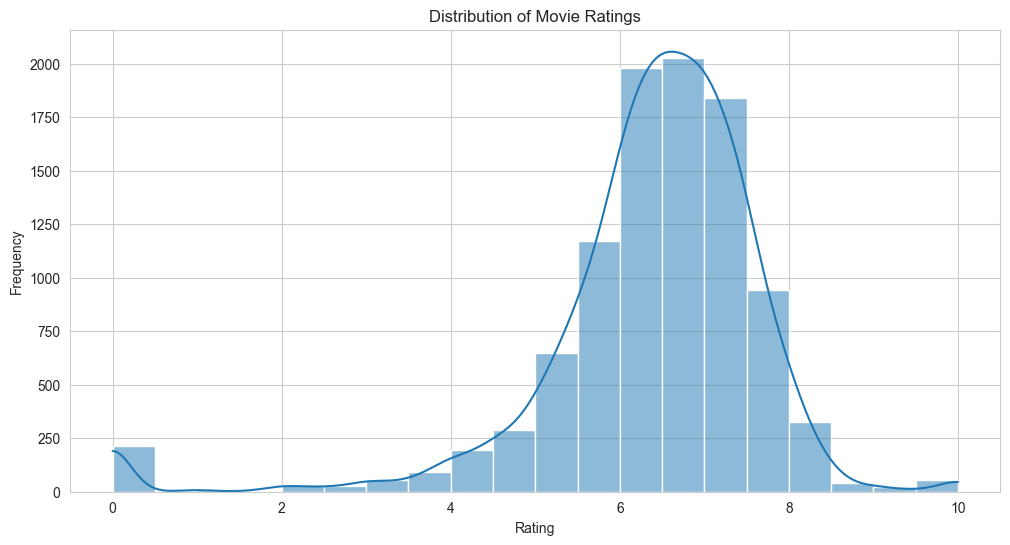

count    9972.000000
mean        6.352138
std         1.405125
min         0.000000
25%         5.900000
50%         6.549000
75%         7.170000
max        10.000000
Name: Rating, dtype: float64


In [4]:
# Rating distribution
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Rating stats
rating_stats = df['Rating'].describe()
print(rating_stats)

## Genre Analysis

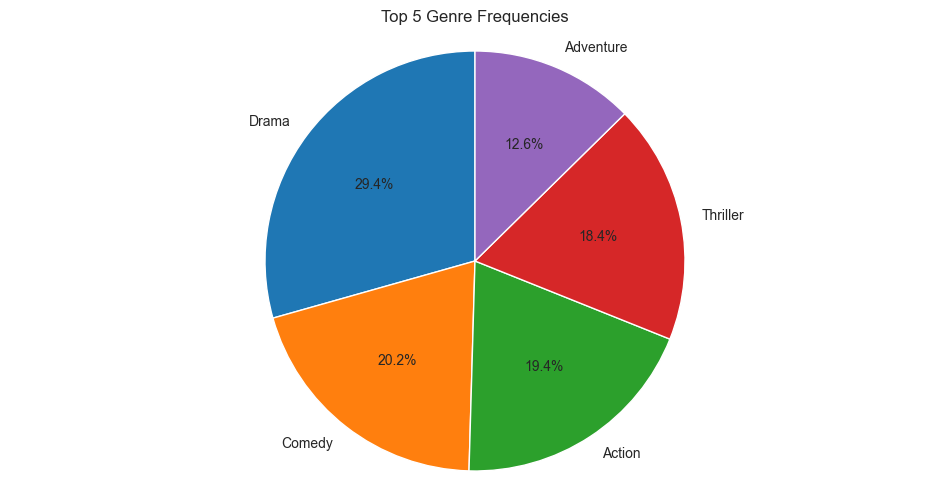

In [5]:
# Explode genres for analysis
df_genres = df.copy()
df_genres['Genre'] = df_genres['Genre'].str.split(',')
df_genres = df_genres.explode('Genre')
df_genres['Genre'] = df_genres['Genre'].str.strip()

# Genre frequencies (top 5 for pie chart, as categories <=5)
genres = df_genres['Genre'].value_counts().reset_index(name='Count')
genres.columns = ['Genre', 'Count']
top_5_genres = genres.head(5)

# Use pie chart for top 5
plt.pie(top_5_genres['Count'], labels=top_5_genres['Genre'], autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Genre Frequencies')
plt.axis('equal')
plt.show()

## Top-Rated Movies

In [6]:
# Top 10 rated movies
top_rated = df.sort_values('Rating', ascending=False).head(10)[['Title', 'Year', 'Rating', 'Genre']]
top_rated

,Title,Year,Rating,Genre
43,Super Large Newcomer NO.1STYLE Sakura Shirakam...,2024,10.0,Documentary
30,Forbidden Immoral Sex 3: Too Young Stepmother,2018,10.0,Drama
9534,Illegal Business,2006,10.0,"Drama, Action, Thriller, Crime"
464,Elena,2017,10.0,Drama
6580,Miss Kobayashi's Dragon Maid: A Lonely Dragon ...,2025,10.0,"Animation, Comedy, Fantasy"
89,Night,2024,10.0,Animation
4544,Hollywood She-Wolves,1976,10.0,Drama
446,Oho Enthan Baby,2025,10.0,Romance
512,Strawberry Prince Movie: The Beginning - Straw...,2024,10.0,"Animation, Music"
536,Amazing Berendeev,1976,10.0,Family


In [7]:
# Overall statistical summary
df.describe(include='all')

,Title,Year,Rating,Description,Genre,Decade
count,9972,9972.0,9972.000000,9972,9972,9972.0
unique,9518,<NA>,NaN,9753,2189,<NA>
top,Beauty and the Beast,<NA>,NaN,No description available,Drama,<NA>
freq,4,<NA>,NaN,101,600,<NA>
mean,NaN,2005.363317,6.352138,NaN,NaN,2000.902527
std,NaN,19.911379,1.405125,NaN,NaN,20.176429
min,NaN,1902.0,0.000000,NaN,NaN,1900.0
25%,NaN,1998.0,5.900000,NaN,NaN,1990.0
50%,NaN,2011.0,6.549000,NaN,NaN,2010.0
75%,NaN,2020.0,7.170000,NaN,NaN,2020.0


## Genre Popularity Evolution Across Decades

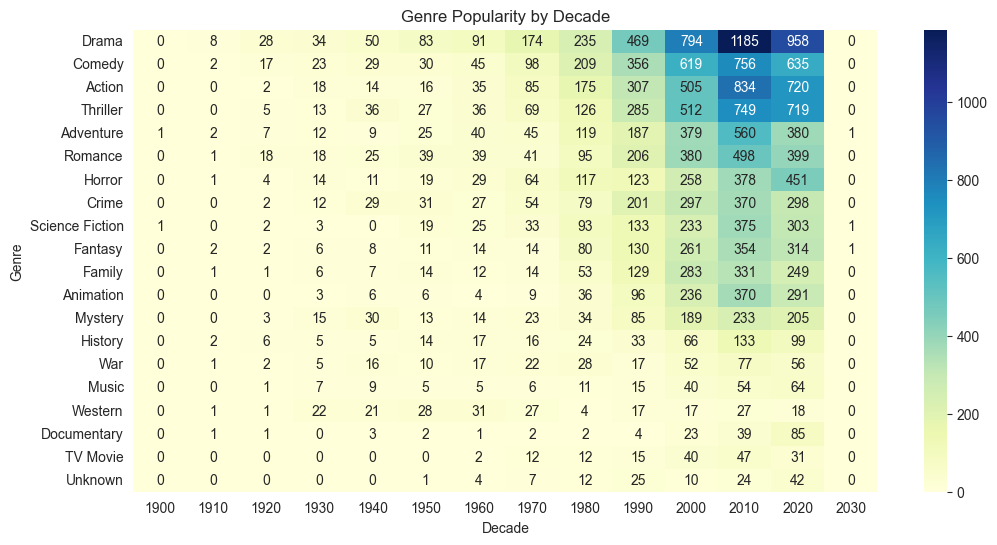

In [8]:
# Group by decade and genre
genre_decade = df_genres.groupby(['Decade', 'Genre']).size().reset_index(name='Count')

# Top genres per decade
top_genres = genre_decade.groupby('Decade').apply(lambda x: x.nlargest(5, 'Count'), include_groups=False).reset_index(drop=True)

# Heatmap of genre popularity by decade
pivot_genre = genre_decade.pivot(index='Genre', columns='Decade', values='Count').fillna(0)
top_pivot = pivot_genre.loc[genres.head(20)['Genre']]  # Limit to top 20 genres for clarity
sns.heatmap(top_pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Genre Popularity by Decade')
plt.show()

## Movie Release Patterns

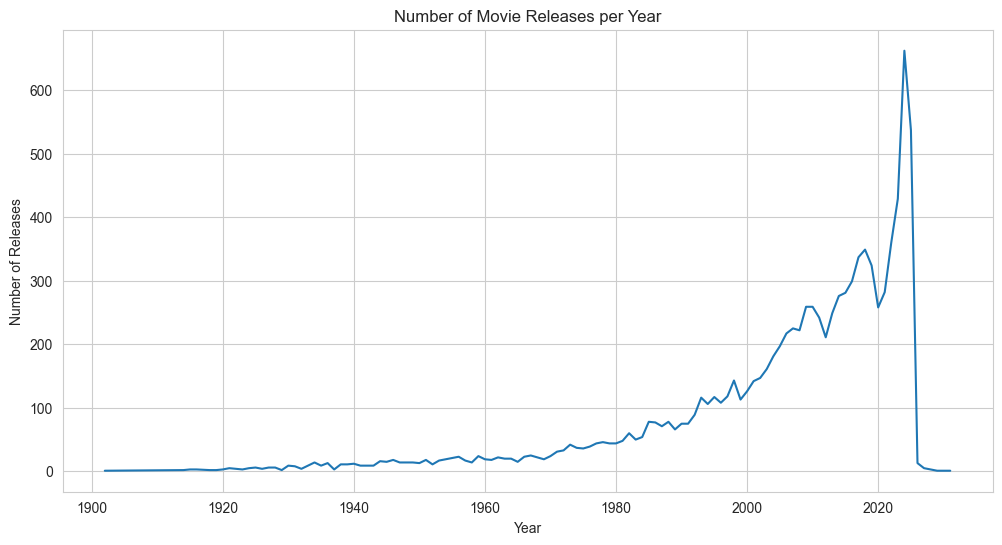

In [9]:
# Releases per year
releases_year = df['Year'].value_counts().sort_index()
releases_year.plot(kind='line')
plt.title('Number of Movie Releases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.show()

## Rating Trends and Correlations

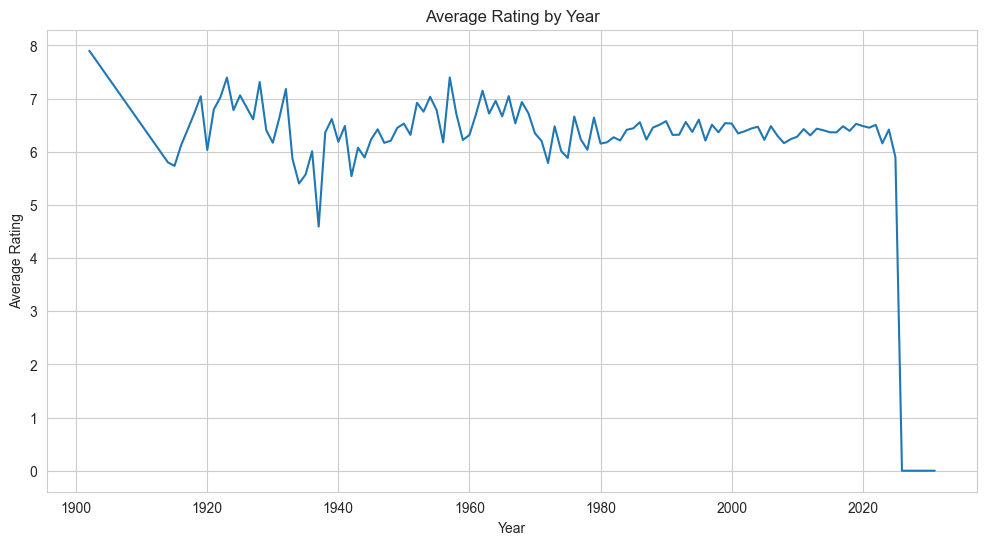

            Year    Rating
Year    1.000000 -0.033333
Rating -0.033333  1.000000


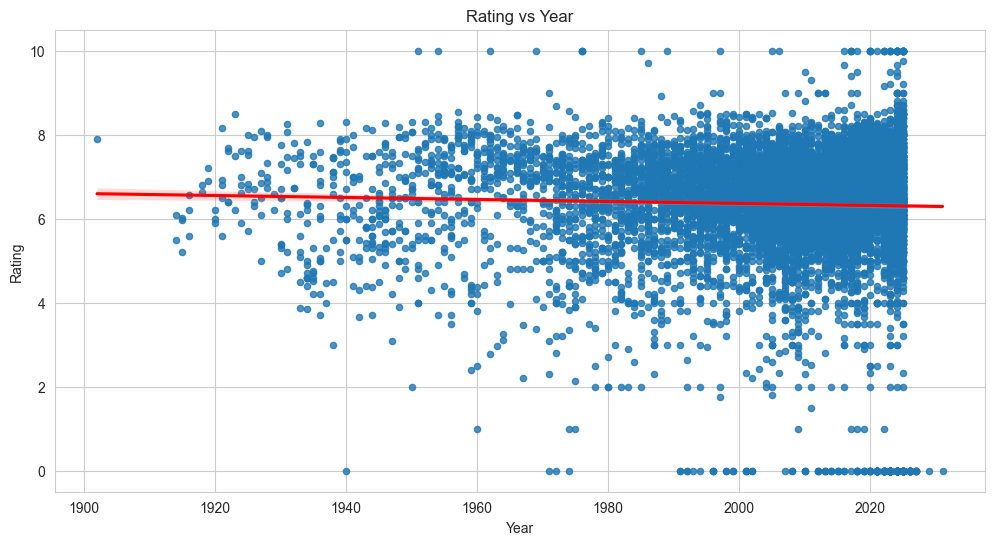

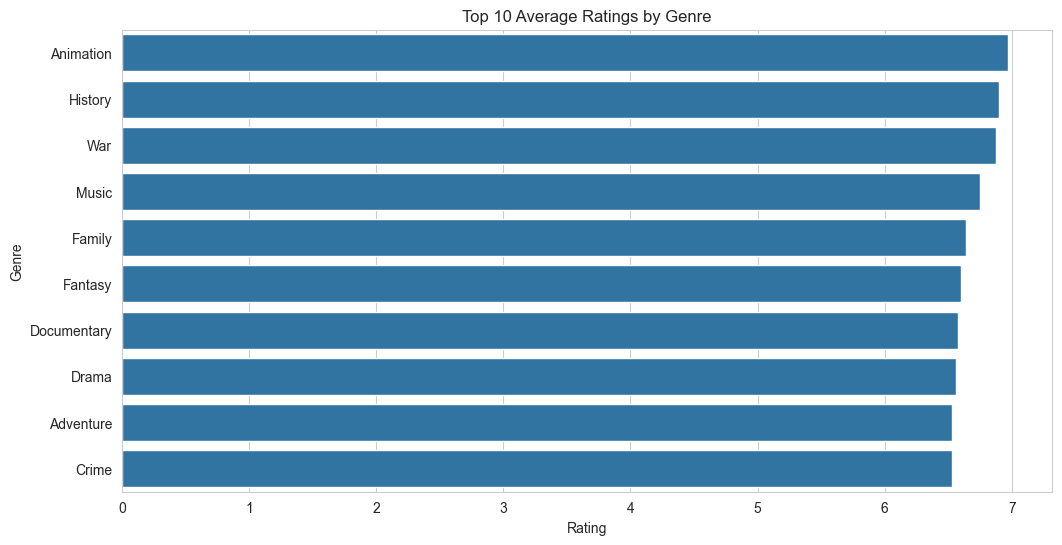

In [10]:
# Rating trends by year
yearly_rating = df.groupby('Year')['Rating'].mean()
yearly_rating.plot(kind='line')
plt.title('Average Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

# Correlation between Year and Rating
corr = df[['Year', 'Rating']].corr()
print(corr)

# Scatter plot with regression
sns.regplot(data=df, x='Year', y='Rating', scatter_kws={'s':20}, line_kws={'color':'red'})
plt.title('Rating vs Year')
plt.show()

# Average rating by genre (top 10 bar, since >5 categories)
genre_rating = df_genres.groupby('Genre')['Rating'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=genre_rating.head(10), x='Rating', y='Genre')
plt.title('Top 10 Average Ratings by Genre')
plt.show()

## Key Takeaways

In [11]:
target_movies = tmdb_scraper.target_movies

df = pd.read_csv("../tmdb_movies.csv")

summary_md = f"""
## **Key Takeaways**
- The dataset has {df.shape[0]} movies with average rating of {df['Rating'].mean():.2f}.
- Most common genre is {genres.iloc[0]['Genre']}.
- Data quality is generally good, with minimal missing values in {missing_df[missing_df['Missing'] > 0].index.tolist()}.
- Movie releases have increased significantly in recent years.
- Ratings show {'slight decrease' if corr.iloc[0,1] < 0 else 'slight increase'} over time.
- Popular genres evolve, with modern decades showing more diversity.
"""

display(Markdown(summary_md))

if len(df) < target_movies:
    display(Markdown(f"#### ⚠️ **NOTE: {target_movies - len(df)} movie(s) skipped due to API limits.**\n"))


## **Key Takeaways**
- The dataset has 9999 movies with average rating of 6.34.
- Most common genre is Drama.
- Data quality is generally good, with minimal missing values in [3, 4].
- Movie releases have increased significantly in recent years.
- Ratings show slight decrease over time.
- Popular genres evolve, with modern decades showing more diversity.


#### ⚠️ **NOTE: 1 movie(s) skipped due to API limits.**



---

<div align="center">
    <p>
        <a href="https://raw.githubusercontent.com/HERALDEXX/tmdb-movie-scraper/refs/heads/main/LICENSE" target="_blank">
            <img src="https://img.shields.io/badge/License-MIT-yellow.svg?style=flat-square" alt="Click to View MIT License" style="vertical-align: middle;" />
        </a> <strong style="font-weight: bold;">• © 2025 Herald Inyang •</strong> 
        <a href="https://github.com/HERALDEXX" target="_blank">
            <img src="https://img.shields.io/badge/GitHub-HERALDEXX-000?style=flat-square&logo=github" alt="GitHub Badge" style="vertical-align: middle;" />
        </a>
    </p>
</div>

---
